In [33]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches

In [34]:
# settings
sns.set_style("darkgrid")
figure_path = "figs" + os.sep
ID = "0508"
folder_structure = True

In [35]:
# colors we use in the figures
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [36]:
# Here we load the data
if not folder_structure:
    file_name = "../results/results_" + ID + ".csv"
    data = pd.read_csv(file_name, index_col = None)
else:
    directory = "../results/results_" + ID
    idx = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if not filename.endswith(".csv"):
            continue
        newdata = pd.read_csv(f, index_col = None)
        if idx == 0:
            data = newdata
        else:
            data = pd.concat([data, newdata], ignore_index=True)
        idx += 1

full_data = data.copy(deep=True)
data = data.loc[(data["init_canSendMessages"] == True) & (data["resp_canSendMessages"] == True)]

In [37]:
# check the column names
print(data.columns)
print(len(full_data))
print(len(data))

Index(['init_tom', 'resp_tom', 'init_lr', 'resp_lr', 'init_canSendMessages',
       'resp_canSendMessages', 'init_canLie', 'resp_canLie', 'init_initPoints',
       'resp_initPoints', 'init_finalPoints', 'resp_finalPoints', 'init_gain',
       'resp_gain', 'nr_offers', 'outcome_is_StrictPE', 'outcome_is_highestSW',
       'outcome_is_new_distribution',
       'there_is_better_outcome_than_initial_situ', 'reached_max_num_offers',
       'passed_time'],
      dtype='object')
7200
7200


In [38]:
av_data = data.groupby(["init_tom", "resp_tom", "init_canSendMessages", "resp_canSendMessages", "init_canLie", "resp_canLie"]).mean()
# data = data[data["outcome"]] only configure situations where there is a better outcome.
pd.set_option('display.max_rows', None)
print(av_data[["init_gain"]])
# pd.reset_option('display.max_rows')

                                                                                     init_gain
init_tom resp_tom init_canSendMessages resp_canSendMessages init_canLie resp_canLie           
0        0        True                 True                 False       False          147.680
                                                                        True           123.385
                                                            True        False          140.650
                                                                        True            95.545
         1        True                 True                 False       False          106.215
                                                                        True           117.635
                                                            True        False          106.520
                                                                        True           122.275
         2        True                 True       

In [39]:
# BOXPLOT
# df_init0_mean = df_init0.groupby(["resp_tom", "resp_canLie"]).mean()
# df_init0_se = df_init0.groupby(["resp_tom", "resp_canLie"]).sem()
# names = ["ToM=" + ",\nlying=".join(map(str, name)) for name in list(df_init0_mean.index)]

# plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
# plt.bar(names, df_init0_mean["init_gain"], width = 0.4)
# plt.errorbar(names, df_init0_mean["init_gain"], yerr=df_init0_se["init_gain"], fmt='.', ecolor='red', color='blue')
# plt.ylabel('Initiator gain', size=16)
# plt.xlabel('Responder type', labelpad=10, size=16)

In [40]:
# figure settings
figsize = (10,10)
label_names = ["ToM=0,canLie=False", "ToM=0,canLie=True", 
               "ToM=1,canLie=False", "ToM=1,canLie=True", 
               "ToM=2,canLie=False", "ToM=2,canLie=True"]
fig_label_names = ["ToM=0,\ncan lie=False", "ToM=0,\ncan lie=True", 
                   "ToM=1,\ncan lie=False", "ToM=1,\ncan lie=True",
                   "ToM=2,\ncan lie=False", "ToM=2,\ncan lie=True"]
TICK_SIZE = 22

LABEL_SIZE = 30
TITLE_SIZE = 30
RIGHT_LIM = 800
LEFT_LIM = -50

INIT_COL = sns.color_palette('colorblind')[0]
RESP_COL = sns.color_palette('colorblind')[1]

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25
BETWEEN_SPACE = 1

Y_TICKS = [(1 + INNER_HALFSPACE*2) + x*(BETWEEN_SPACE+2*INNER_HALFSPACE) for x in range(len(label_names))]

meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=10)

In [41]:
# Miscellaneous functions:


In [42]:
# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True,
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'means']:
        plt.setp(bp[element][0], color='black')
        plt.setp(bp[element][1], color='black')
        
    plt.setp(bp['fliers'][0], color='black', alpha=0)
    plt.setp(bp['fliers'][1], color='black', alpha=0)

    bp['boxes'][0].set(facecolor=INIT_COL)
    bp['boxes'][1].set(facecolor=RESP_COL)
    
    fill_colors = [INIT_COL, RESP_COL]
    for i in [0,1]:
        top_points = bp["fliers"][i].get_data()
        x = top_points[0]
        y = np.random.normal(top_points[1], 0.05, size=len(top_points[1]))
        ax.scatter(x, y, color=fill_colors[i], alpha=0.5, linewidth=0)
    

def make_multiple_boxplots(df, y_label, title):
    fig, ax = plt.subplots(figsize = figsize)
    
    for idx, label_name in enumerate(label_names):
        plot_data = [list(df[df["id"] == label_name]["init_gain"]),
                     list(df[df["id"] == label_name]["resp_gain"])]
        
        make_box_plot(plot_data, [Y_TICKS[idx]+INNER_HALFSPACE, Y_TICKS[idx]-INNER_HALFSPACE], ax)

    ax.set_yticks(Y_TICKS)
    ax.set_yticklabels(fig_label_names)
    plt.setp(ax.yaxis.get_majorticklabels(), ha='left')
    ax.yaxis.set_tick_params(pad=1.6*max(T.label1.get_window_extent().width for T in ax.yaxis.majorTicks))
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 2.3))
    
    ax.legend((mpatches.Patch(facecolor=INIT_COL, edgecolor='black', label="Initiator"),
               mpatches.Patch(facecolor=RESP_COL, edgecolor='black', label="Responder"),
               plt.Line2D([0], [0], color=meanpointprops["markerfacecolor"], marker=meanpointprops["marker"], 
                          markeredgecolor=meanpointprops["markeredgecolor"], markersize=meanpointprops["markersize"], linewidth=0),
               plt.Line2D([],[], color="black", marker="o", markeredgecolor="black", linewidth=0)),
              ("  Initiator", "  Responder", "Mean", "Outlier"), fontsize=TICK_SIZE, ncol=2, fancybox=True, loc="upper center",
              handletextpad=0)
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    
    fig.supxlabel('Score gain', fontsize=LABEL_SIZE)
    fig.supylabel(y_label, x=0, fontsize=LABEL_SIZE)
    fig.suptitle(title, fontstyle='italic', fontsize=TITLE_SIZE)
    fig.tight_layout()
    plt.minorticks_on()
    
    return fig, ax

def make_boxplot_init(data, title):
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    df = data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]].copy()
    df["id"] = df.apply(lambda x: "ToM=" + str(x['resp_tom']) + ",canLie=" + str(x['resp_canLie']), axis=1)
    df = df[["id", "init_gain", "resp_gain"]]
    
    return make_multiple_boxplots(df, "Responder type", title)
    
    
def make_boxplot_resp(data, title):

    df = data[["init_tom", "init_canLie", "init_gain", "resp_gain"]]
    df["id"] = df.apply(lambda x: "ToM=" + str(x['init_tom']) + ",canLie=" + str(x['init_canLie']), axis=1)
    df = df[["id", "init_gain", "resp_gain"]]

    return make_multiple_boxplots(df, "Initiator type", title)

In [43]:
def make_violin_plot(data, pos, ax):
    # fill_colors = [sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[1]]
    # edge_colors = ["black", "black"]

    bp = ax.violinplot(data, vert=0, positions=pos, widths=BIN_WIDTH)
    
    for pc in bp['bodies']:
        print(pc)
    
    return bp

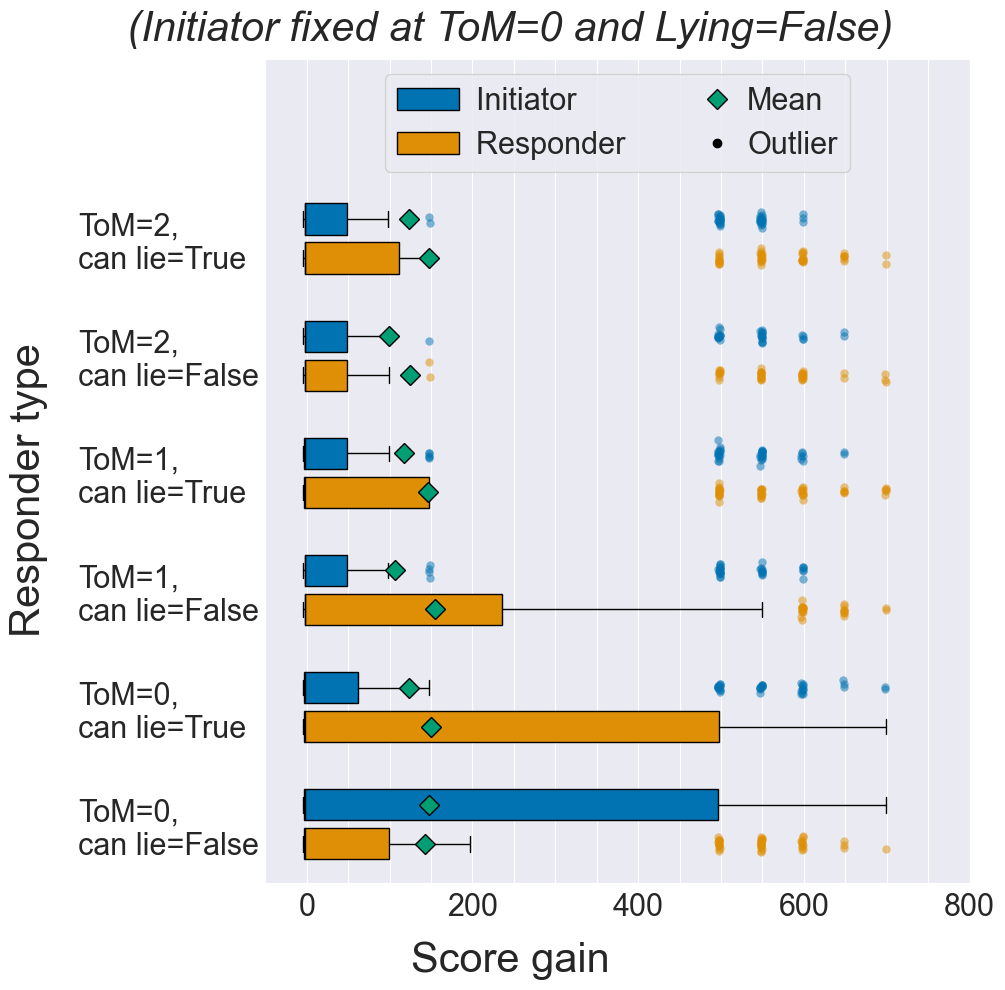

In [44]:
df_init0 = data.loc[(data["init_tom"] == 0) & (data["init_canLie"] == False)]

fig, ax = make_boxplot_init(df_init0, "(Initiator fixed at ToM=0 and Lying=False)")

plt.savefig(figure_path + "savedfig_init0_" + ID + ".pdf")
plt.show()

In [45]:
df_init0_without = full_data.loc[(full_data["init_tom"] == 0) & (full_data["init_canLie"] == False) & (full_data["init_canSendMessages"] == False) & (full_data["resp_canSendMessages"] == False)]

print(df_init0_without)

# fig, ax = make_boxplot_init(df_init0_without, "")
# plt.show()

print(len(full_data))
print(len(data))


Empty DataFrame
Columns: [init_tom, resp_tom, init_lr, resp_lr, init_canSendMessages, resp_canSendMessages, init_canLie, resp_canLie, init_initPoints, resp_initPoints, init_finalPoints, resp_finalPoints, init_gain, resp_gain, nr_offers, outcome_is_StrictPE, outcome_is_highestSW, outcome_is_new_distribution, there_is_better_outcome_than_initial_situ, reached_max_num_offers, passed_time]
Index: []

[0 rows x 21 columns]
7200
7200
